## Set interesting articles

In [1]:
%load_ext autoreload
%autoreload 2
from mongoengine import connect
from hatespeech_models import Tweet, Article

client = connect("hatespeech-labelling", port=27019)
db = client["hatespeech-labelling"]

In [2]:
Article.objects.count()

65958

In [3]:
initial_query = {
    "comments__9__exists": True,
    "comments__hateful_value__gt": 0.9
}
articles = Article.objects(**initial_query).search_text("Coronavirus COVID-19 China").as_pymongo()
print(articles.count())

6347


In [4]:
articles = list(articles)

In [7]:
for article in articles:
    hateful_comments = [c for c in article["comments"] if c["hateful_value"] > 0.5]
    
    article["num_hateful_comments"] = len(hateful_comments)
    article["avg_hate_value"] = sum(c["hateful_value"] for c in article["comments"]) / len(article["comments"])


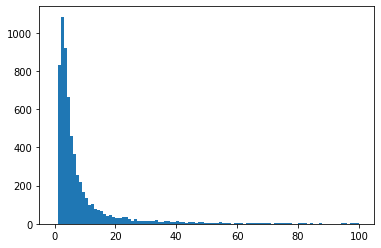

In [8]:
import matplotlib.pyplot as plt

plt.hist([c["num_hateful_comments"] for c in articles], range=[0, 100], bins=100);

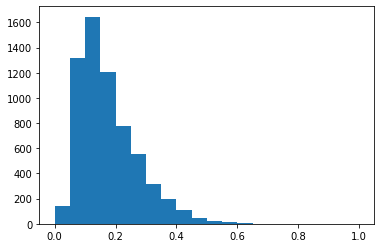

In [10]:
import matplotlib.pyplot as plt

plt.hist([c["avg_hate_value"] for c in articles], range=[0, 1], bins=20);

In [11]:
nice_articles = [art for art in articles if art["avg_hate_value"] > 0.35]
#nice_articles = [art for art in all_articles if art["num_hateful_comments"] > 3]

len(nice_articles)

393

In [12]:
len_comments = sum([len(art["comments"]) for art in nice_articles])

print(len_comments)

28360


Text(0.5, 1.0, 'Cantidad de comentarios')

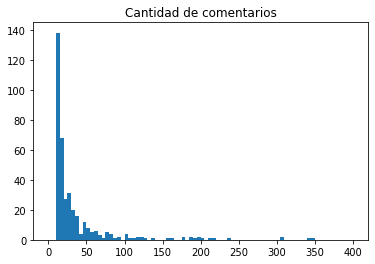

In [13]:
plt.hist([len(art["comments"]) for art in nice_articles], range=[0, 400], bins=80)
plt.title("Cantidad de comentarios")

Text(0.5, 1.0, 'Distribución de fechas de artículos')

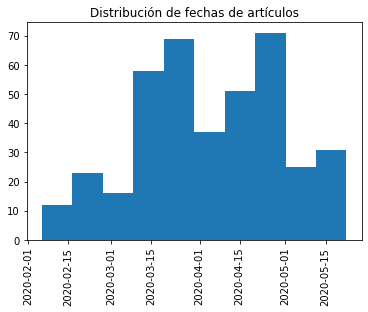

In [14]:

plt.hist([art["created_at"] for art in nice_articles])
plt.xticks(rotation=90);
plt.title("Distribución de fechas de artículos")

In [15]:
db.article.update_many({}, {"$set": {"selected": False}})

In [16]:
for article in nice_articles:
    db.article.update_one({"_id": article["_id"]}, {"$set": {"selected": True}})

In [17]:
db.article.create_index("selected")

'selected_1'